# Smad nucleocytoplasmic shuttling in a mutated system 

Author: Gianna Nossa

Deliverables

For this project:
 - There are 6 tasks that you need to complete.
 - There are three types of tasks: equation derivation, coding tasks, and discussion questions. 
 
 
Introduction:
Transforming growth factor- β (TGF- β) ligands regulate many cell functions, from cell growth to apoptosis, in both mature organisms and in embryogenesis [1]. All of these functions can occur by TGF- β ligands binding to its receptor on the cell membrane, triggering a signaling cascade, which includes Smad proteins [2]. Smads are a group of proteins that, in their active form, transduce signal from the membrane to the nucleus. Smad-dependent signaling initiated by TGF- β is categorized in four groups: receptor activation, Smad nucleoplasmic dynamics, Smad transcriptional regulation, and feedback control [3]. Schmierer et al. focuses on Smad nucleoplasmic dynamics, for which the network was already known, allowing them to develop their hypothesis that activated signaling is dynamic based on the observation that Smads migrate to and from the nucleus both in the presence and absence of TGF- β [3]. However, this hypothesis wasn’t able to be tested experimentally, so the authors developed a mathematical model, simulating the cell’s signaling network, that would allow them to test their hypothesis [3]. The model simulates signal transduction in cultured cells in response to TGF-β, and was verified with reproducibility and prediction experiments in HaCaT EGFP-Smad2 cell lines. We now plan to use this mathematical model to examine the behavior of a biallelic mutation of Smad4, which has been found to influence the initiation and progression of tumorigenesis in colorectal cancer in adults [4]. This could potentially elucidate future implications for targeted therapy for colorectal cancer.


PART 1:
TGF- β signaling is responsible for various cellular processes, initiated by the activation of Smad proteins. TGF- β binds and activates the serine/threonine kinase receptor on the cell surface, which allows the type II subunit to phosphorylate the R-Smads, Smad 2 and Smad3, in the cytoplasm. This allows them to form either homomeric or heteromeric complexes with Smad4. Smad3 is assumed to behave identically to Smad2, and is therefore omitted in the remainder of the paper and this project. Monomeric Smad2, pSmad2 and Smad4 are able to reversibly move between the nucleus and cytoplasm. Phosphorylated Smad complexes irreversibly congregate in the nucleus, and together with other factors, control gene transcription [5], with heteromeric complexes (Smad2/Smad4 complexes) being transcriptionally dominant [6]. SB-421542 is an inhibitor that reversibly binds the kinase receptor and disables this signaling cascade.
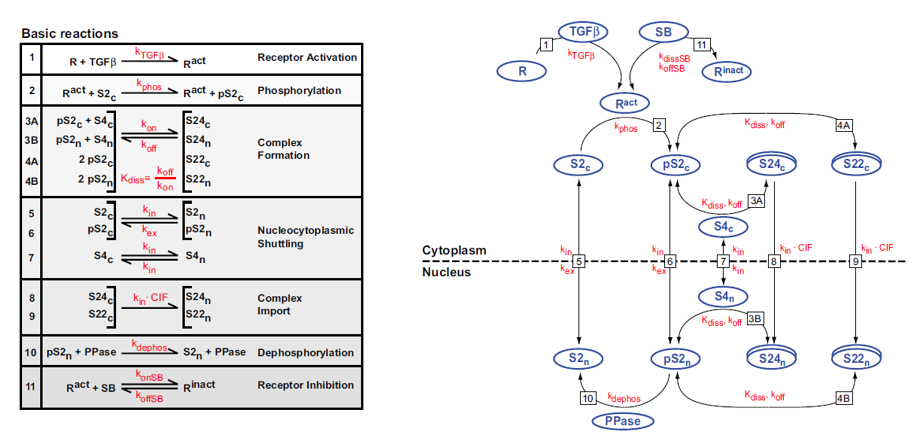 
Note: the double sided arrows represent reversible reactions.

Important Assumptions:

1. Monomeric phospho-Smad2 is assumed to freely shuttle between nucleus and cytoplasm

2. Expression levels of all involved proteins are considered constant

3. Smad2 and Smad3 go through identical reactions and are considered a single species in this model

4. Import and export rates (kIN4) are assumed to be equal for Smad4 

5. The rates at which homomeric and heteromeric complexes form are assumed to be the same.



TASK 1: 

Using the system schematic and table of chemical reactions above, derive a system of ordinary differential equations that describe the dynamics of the Smad system. Equations for the receptor dynamics are provided.

Equations for receptor dynamics:
    
    dRdt = (-kTGFB*R*TGFB)
    
    dTGFBdt = (-kTGFB*R*TGFB)
    
    dR_actdt = (kTGFB*R*TGFB) - (kONsb*R_act*SB) + (kOFFsb*R_inact)
    
    dR_inactdt = (kONsb*R_act*SB) - (kOFFsb*R_inact)
    
    dSBdt = (kOFFsb*R_inact) - (kONsb*R_act*SB)


Enter your differential equations below:

    dS2n/dt = (kIN*S2c) - (kEX*S2n) + (kDEPHOS*pS2n*PPase)
    
    dpS2n/dt = (kIN*pS2c) - (kEX*pS2n) - (kDEPHOS*pS2n*PPase) - (kON*pS2n*(S4n+(2*pS2n))) + (kOFF*(S24n+(2*S22n)))
    
    dS4n/dt = (kIN4*S4c) - (kIN4*S4n) - (kON*S4n*pS2n) + (kOFF*S24n)
    
    dS24n/dt = (kON*pS2n*S4n) - (kOFF*S24n) + (kIN*CIF*S24c)
    
    dS22n/dt = (kON*(pS2n**2)) - (kOFF*S22n) + (kIN*CIF*S22c)
    
    
    dS2c/dt = (kEX*S2n) - (kIN*S2c) - (kPHOS*S2c*R_act)
    
    dpS2c/dt = (kEX*pS2n) - (kIN*pS2c) + (kPHOS*S2c*R_act) - (kON*pS2c*(S4c+(2*pS2c))) + (kOFF*(S24c+(2*S22c)))
    
    dS4c/dt = (kIN4*S4n) - (kIN4*S4c) - (kON*S4c*pS2c) + (kOFF*S24c)
    
    dS24c/dt = (kON*pS2c*S4c) - (kOFF*S24c) + (kIN*CIF*S24c)
    
    dS22c/dt = (kON*(pS2c**2)) - (kOFF*S22c) + (kIN*CIF*S22c)
    

TASK 2:

This code simulate experiments performed in the Schmierer et al. (2008) paper. It will simulate the concentrations of Smad protein variations both in the nucleus and the cytoplasm. We will also analyze signal interpretation of the system using code for a time-step function. Since this simulation is being run on a different platform from what the authors used, some parameters have been optimized to produce a simulation as similar as possible to the one in the paper. The actual values used in the paper can be found in parentheses in the comments.

You will now solve your equations from Task 1 and plot the solutions. This will help you understand what biologically happens in a normal steady state of the Smad system.

Enter your equations in the appropriate place in the code below and plot your solutions.

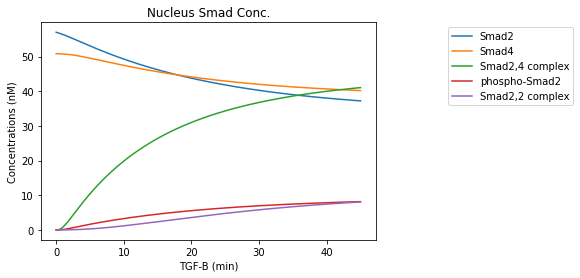

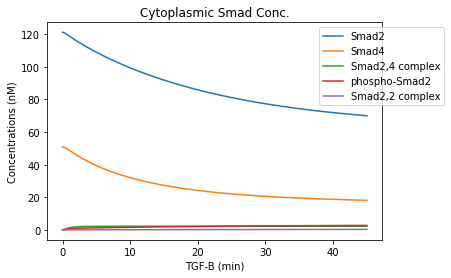

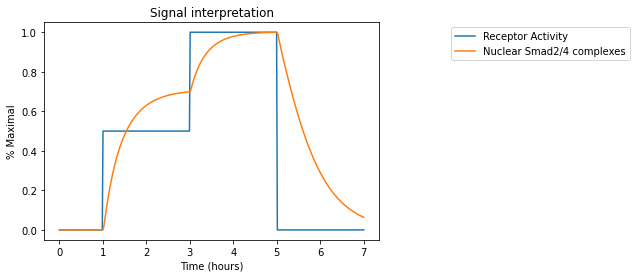

In [1]:

import matplotlib.pyplot as plt      # import plotting libraries
import numpy as np                   # import data structuring
from scipy.integrate import odeint   # import ODE integrating function
import math as m                     # import math operations

# Kinetic Rates: Declare parameter values

kTGFB = 0.074              # [nM-1s-1] rate constant for receptor activation (RECI = 0.074; RO = 0.13)
kPHOS = 0.000404           # [nM-1s-1] rate constant for R-Smad phosphorylation  (RECI = 0.000404; RO = 0.000884)
kDEPHOS = 0.0045           # [nM-1s-1] rate constant for R-Smad dephosphorylation  (RECI = 0.00657; RO = 0.0138)
kDISS = 8.7                # [nM]      rate constant for the dissociation of complexes (RECI = 8.7; RO = 4.6)
kOFF = 0.016               # s-1       kON and kOFF are reversible rate constants for the formation of homomeric  
kON = kOFF / kDISS         # [nM-1s-1]   and heteromeric complexes
kIN = 0.00255              # s-1       kIN and kEX are reversible rate constants for the reversible shuttle between
kEX = 0.0056               # s-1         nucleus and cytoplasm 
kDISSsb = 684              # [nM]      rate constant for the dissociation of receptor and inhibitor (RECI = 684; RO = 461)
kOFFsb = 100               # s-1       kONsb and kOFFsb are reversible rate constants for the reversible block of 
kONsb = kOFFsb /kDISSsb    # [nM-1s-1]   the receptor kinase by SB431542
kIN4 = 0.0025              # s-1       kIN4 is the reversible rate constant for the reversible shuttle of Smad4
                           #             between nucleus and cytoplasm (these values were optimized for this code, not given)

CIF = 10                   # relative complex import rate (RECI = 5.7; RO = 1) 
PPase = 0.75               # concentration in nM of phosphatase  (fixed to 1)

# Initial Conditions: Declare initial concentrations (all in nM)
R0 = 2              # intial concentration of unbound receptor (fixed to 1)
R_act0 = 0          # intial concentration of TGF-B-activated receptor
R_inact0 = 0        # initial concentration of SB-431542 bound receptor
SB0 = 0             # initial concentration of SB-431542 (10000nM is added at time = 45min)    
TGFB0 = 1.26        # initial concentration of TGF-B  (0.42 nM)

Smad2n0 = 57        # initial monomeric, homomeric, and heteromeric Smad concentrations in the nucleus
Smad4n0 = 50.8        
Smad24n0 = 0
pSmad2n0 = 0
Smad22n0 = 0

Smad2c0 = 121.2     # initial monomeric, homomeric, and heteromeric Smad concentrations in the cytoplasm
Smad4c0 = 50.8         
Smad24c0 = 0
pSmad2c0 = 0
Smad22c0 = 0

# Step function time stamps
step = False

# Create a list of all the initial conditions
n0 = [Smad2n0, Smad4n0, Smad24n0, pSmad2n0, Smad22n0, Smad2c0, Smad4c0, Smad24c0, pSmad2c0, Smad22c0, R0, R_act0, R_inact0, SB0, TGFB0]

z = 420    # Declare the number of timesteps
seconds = 2700
t = np.linspace(0, seconds, z)    # Create time array

# Create a function to solve a set of ODE's
def smad(n, t1):
    S2n = n[0]
    S4n = n[1]
    S24n = n[2]
    pS2n = n[3]
    S22n = n[4]
    
    S2c = n[5]
    S4c = n[6]
    S24c = n[7]
    pS2c = n[8]
    S22c = n[9]
    
    R = n[10]
    
    if step is False:            # This establishes the time-step in seconds for receptor activity
        R_act = n[11]
    else:
        if t1 < 3600:
            R_act = 0
        elif t1 < 10800:
            R_act = 0.5
        elif t1 < 18000:
            R_act = 1
        else:
            R_act = 0
        
    R_inact = n[12]
    SB = n[13]
    TGFB = n[14]
    
    # Create the differential equations
        # Receptor activation/inactivation
    dRdt = (-kTGFB*R*TGFB)
    
    dTGFBdt = (-kTGFB*R*TGFB)
    
    dR_actdt = (kTGFB*R*TGFB) - (kONsb*R_act*SB) + (kOFFsb*R_inact)
    
    dR_inactdt = (kONsb*R_act*SB) - (kOFFsb*R_inact)
    
    dSBdt = (kOFFsb*R_inact) - (kONsb*R_act*SB)
    
        # Concentrations in the nucleus
    dS2ndt = (kIN*S2c) - (kEX*S2n) + (kDEPHOS*pS2n*PPase)
    
    dpS2ndt = (kIN*pS2c) - (kEX*pS2n) - (kDEPHOS*pS2n*PPase) - (kON*pS2n*(S4n+((2)*pS2n))) + (kOFF*(S24n+((2)*S22n)))
    
    dS4ndt = (kIN4*S4c) - (kIN4*S4n) - (kON*S4n*pS2n) + (kOFF*S24n)
    
    dS24ndt = (kON*pS2n*S4n) - (kOFF*S24n) + (kIN*CIF*S24c)
    
    dS22ndt = (kON*(pS2n**(2))) - (kOFF*S22n) + (kIN*CIF*S22c)
    
        # Concentrations in the cytoplasm
    dS2cdt = (kEX*S2n) - (kIN*S2c) - (kPHOS*S2c*R_act)
    
    dpS2cdt = (kEX*pS2n) - (kIN*pS2c) + (kPHOS*S2c*R_act) - (kON*pS2c*(S4c+((2)*pS2c))) + (kOFF*(S24c+((2)*S22c)))
    
    dS4cdt = (kIN4*S4n) - (kIN4*S4c) - (kON*S4c*pS2c) + (kOFF*S24c)
    
    dS24cdt = (kON*pS2c*S4c) - (kOFF*S24c) - (kIN*CIF*S24c)
    
    dS22cdt = (kON*(pS2c**(2))) - (kOFF*S22c) - (kIN*CIF*S22c)
    
    # Timestep equations
    if step is True:
        dR_actdt = 0
    
    # return a list of values
    return[dS2ndt, dS4ndt, dS24ndt, dpS2ndt, dS22ndt, dS2cdt, dS4cdt, dS24cdt, dpS2cdt, dS22cdt, dRdt, dR_actdt, dR_inactdt, dSBdt, dTGFBdt]

# ODE solution
sol_n = odeint(smad, n0, t)

# Assign variable names to solution matrix
Smad2n = sol_n[:,0]
Smad4n = sol_n[:,1] 
Smad24n = sol_n[:,2]
pSmad2n = sol_n[:,3]
Smad22n = sol_n[:,4]

Smad2c = sol_n[:,5]
Smad4c = sol_n[:,6]
Smad24c = sol_n[:,7]
pSmad2c = sol_n[:,8]
Smad22c = sol_n[:,9]

# Step Function ODE solution
step = True
sec = 25200
tstep = np.linspace(0, sec, z)
step_n = odeint(smad, n0, tstep)

# Assign variable names
S24n_step = step_n[:,2]

if max(S24n_step) != 0:
    S24n_stepPC = [i/max(S24n_step) for i in S24n_step]
else:
    S24n_stepPC = [0 for i in S24n_step]

R_step = []
for n in tstep:
    if n < 3600:
        R_step.append(0)
    elif n < 10800:
        R_step.append(.5)
    elif n < 18000:
        R_step.append(1)
    else:
        R_step.append(0)
    
x1 = np.linspace(0,seconds/60,z)  # Changes time from seconds to minutes
x2 = np.linspace(0,sec/3600, z)   # Changes time-step from seconds to hours

# Figure 1: Smad concentrations during TGF-B stimulation in nucleus
plt.figure(num=1)
plt.plot(x1, Smad2n, label="Smad2")
plt.plot(x1, Smad4n, label="Smad4")
plt.plot(x1, Smad24n, label="Smad2,4 complex")
plt.plot(x1, pSmad2n, label="phospho-Smad2")
plt.plot(x1, Smad22n, label="Smad2,2 complex")

plt.xlabel("TGF-B (min)")
plt.ylabel("Concentrations (nM)")
plt.title("Nucleus Smad Conc.")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))

# Figure 2: Smad concentrations during TGF-B stimulation in cytoplasm
plt.figure(num=2)
plt.plot(x1, Smad2c, label="Smad2")
plt.plot(x1, Smad4c, label="Smad4")
plt.plot(x1, Smad24c, label="Smad2,4 complex")
plt.plot(x1, pSmad2c, label="phospho-Smad2")
plt.plot(x1, Smad22c, label="Smad2,2 complex")

plt.xlabel("TGF-B (min)")
plt.ylabel("Concentrations (nM)")
plt.title("Cytoplasmic Smad Conc.")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))

    
# Figure 3: 
plt.figure(num=4)
plt.plot(x2, R_step, label="Receptor Activity")
plt.plot(x2, S24n_stepPC, label="Nuclear Smad2/4 complexes")

plt.xlabel("Time (hours)")
plt.ylabel("% Maximal")
plt.title("Signal interpretation")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))



Example results: This is what your graphs should look like
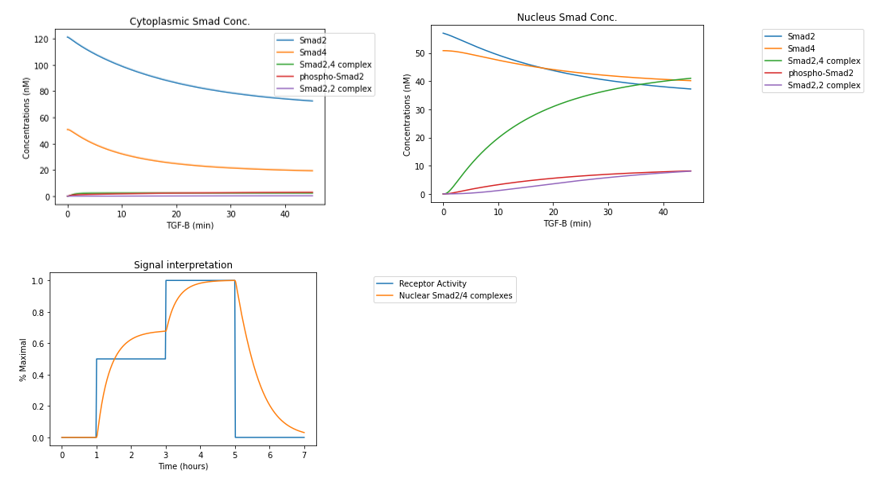

TASK 3:

Reflect on your results by answering the following questions:

1.) Why do we see a difference between the concentrations of hetero- and homomeric complexes in the nucleus? Why don't we see this difference in the cytoplasm?

2.) How does the rate of change of inactivated receptor concentration compare to the rate of change of TGF-β concentration? 

3.)  Describe the relationship between receptor activity and heteromeric complex formation, according to the last graph you simulated.


Answers:

1.) In the cytoplasm, we see a very low concentration of both the Smad2,2 and the Smad2,4 complexes because as soon as the complexes are formed they are shuttled into the nucleus. However, in the nucleus, we see a drastic difference between the Smad2,2 and the Smad2,4 complexes which is an indication that this model predicts a preference for the Smad2,4 complexes, probably due to it being the transcriptionally dominant complex and having a major in the outcome of the signaling cascade.

2.) Because we assume that the rate of receptor activation is constant (provided as kTGFB), we can predict that the concentration of inactive receptors (R) will decrease at a similar rate to the concentration of TGF-β. As TGF-β binds to (causing a decrease in its concentration) and activates receptors, the concentration of inactive receptors will decrease and the concentration of active receptors (R_act) will increase.

3.) The last graph is a simulation of the system's response to a two-step activation of receptions, first at half the maximal activity and second at 100% maximal activity. The graph shows that the formation of Smad2,4 complexes are coupled to receptor activity. We do see a slight time delay, since complex formation doesn't reach 50% activity at the same time as the receptor, however, based on the graph showing that complex formation maintains activity at 100% as long as the receptor activity does, if activity is held long enough, complex activity can reach a steady state where complex formation directly reflects receptor activity.

PART 2:

One of the critical roles of the TGF-β signaling pathway is the negative regulation of epithelial cell proliferation [6]. Smad 2 and Smad 3 form complexes with Smad 4 and passes into the nucleus where it interacts with DNA and regulates the transcription of target genes [7]. The Smad4 gene has been studied in colorectal cancer tumors and a loss of heterozygosity in the 18q chromosome was observed. This mutation prevents homo- and hetero- oligomer complex formation with R smads (Smad4-4, and Smad4-2/3), and reduces Smad4 stability [8]. In addition to this mutation, 95% of metastatic carcinomas also showed a biallelic mutation, resulting in complete inactivation of Smad4 [8].

TASK 4:

Based on this knowledge, which parameters are expected to change with the 18qLOH mutation, and how? Which parameters are expected to change with the biallelic mutation, and how? Note: these parameters should only affect reactions involving Smad4.


Answer:

For the 18qLOH mutation, we would expect kON and kOFF to change, since this mutation only affects the proteins' ability to form complexes. However, because we assume that these rates are the same for Smad2,2 complexes, we can't change these values without seeing a change in the formation of homomeric complexes. For the biallelic mutation, which, as stated above, results in complete inactivation of Smad4, we would set initial cytoplasmic Smad4 (Smad4c0) and nuclear Smad4 (Smad4n0) both equal to zero.


TASK 5:

Copy the previous code to use as a starting point. For this task, we want to model how a biallelic mutation influences the TGF-β signaling cascade. Enter your new parameters in the appropriate place in the code and plot your solutions.

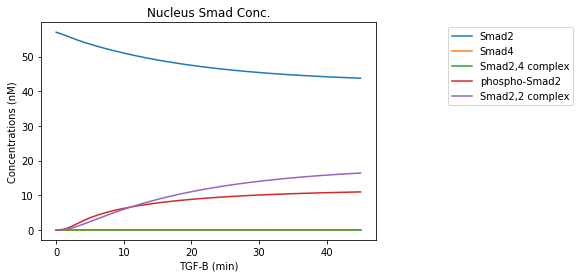

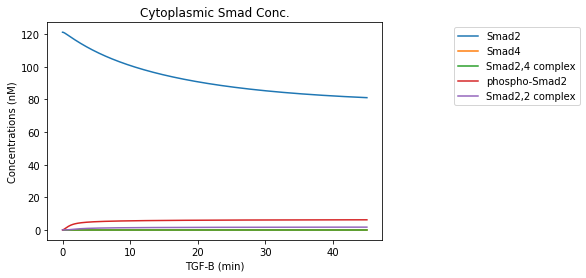

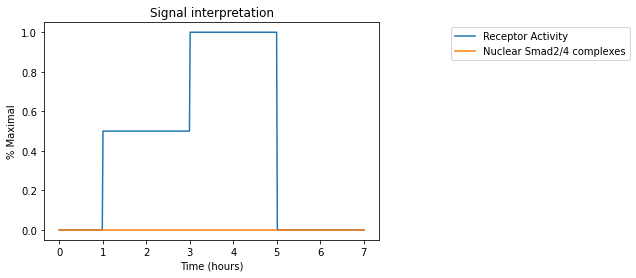

In [2]:

import matplotlib.pyplot as plt      # import plotting libraries
import numpy as np                   # import data structuring
from scipy.integrate import odeint   # import ODE integrating function
import math as m                     # import math operations

# Kinetic Rates: Declare parameter values

kTGFB = 0.074              # [nM-1s-1] rate constant for receptor activation (RECI = 0.074; RO = 0.13)
kPHOS = 0.000404           # [nM-1s-1] rate constant for R-Smad phosphorylation  (RECI = 0.000404; RO = 0.000884)
kDEPHOS = 0.0045           # [nM-1s-1] rate constant for R-Smad dephosphorylation  (RECI = 0.00657; RO = 0.0138)
kDISS = 8.7                # [nM]      rate constant for the dissociation of complexes (RECI = 8.7; RO = 4.6)
kOFF = 0.016               # s-1       kON and kOFF are reversible rate constants for the formation of homomeric  
kON = kOFF / kDISS         # [nM-1s-1]   and heteromeric complexes
kIN = 0.00255              # s-1       kIN and kEX are reversible rate constants for the reversible shuttle between
kEX = 0.0056               # s-1         nucleus and cytoplasm 
kDISSsb = 684              # [nM]      rate constant for the dissociation of receptor and inhibitor (RECI = 684; RO = 461)
kOFFsb = 100               # s-1       kONsb and kOFFsb are reversible rate constants for the reversible block of 
kONsb = kOFFsb /kDISSsb    # [nM-1s-1]   the receptor kinase by SB431542
kIN4 = 0.0025              # s-1       kIN4 and kEX4 are reversible rate constant for the reversible shuttle of Smad4
kEX4 = 0.0025              # s-1         between nucleus and cytoplasm (these values were optimized for this code, not given)

CIF = 10                    # relative complex import rate (RECI = 5.7; RO = 1)
PPase = 0.75                # concentration in nM of phosphatase  (fixed to 1)

# Initial Conditions: Declare initial concentrations (all in nM)
R0 = 2              # intial concentration of unbound receptor (fixed to 1)
R_act0 = 0          # intial concentration of TGF-B-activated receptor
R_inact0 = 0        # initial concentration of SB-431542 bound receptor
SB0 = 0             # initial concentration of SB-431542 (10000nM is added at time = 45min)    
TGFB0 = 1.26        # initial concentration of TGF-B  (0.42 nM)

Smad2n0 = 57        # initial monomeric, homomeric, and heteromeric Smad concentrations in the nucleus
Smad4n0 = 0        
Smad24n0 = 0
pSmad2n0 = 0
Smad22n0 = 0

Smad2c0 = 121.2     # initial monomeric, homomeric, and heteromeric Smad concentrations in the cytoplasm
Smad4c0 = 0         
Smad24c0 = 0
pSmad2c0 = 0
Smad22c0 = 0

# Step function time stamps
step = False

# Create a list of all the initial conditions
n0 = [Smad2n0,Smad4n0,Smad24n0,pSmad2n0,Smad22n0,Smad2c0,Smad4c0,Smad24c0,pSmad2c0,Smad22c0,R0,R_act0,R_inact0,SB0,TGFB0]

z = 420 # Declare the number of timesteps
seconds = 2700
t = np.linspace(0, seconds, z)  # Create time array

# Create a function to solve a set of ODE's
def smad(n, t1):
    S2n = n[0]
    S4n = n[1]
    S24n = n[2]
    pS2n = n[3]
    S22n = n[4]
    
    S2c = n[5]
    S4c = n[6]
    S24c = n[7]
    pS2c = n[8]
    S22c = n[9]
    
    R = n[10]
    
    if step is False:        # This piece of code establishes the time-step in seconds for receptor activity
        R_act = n[11]
    else:
        if t1 < 3600:
            R_act = 0
        elif t1 < 10800:
            R_act = 0.5
        elif t1 < 18000:
            R_act = 1
        else:
            R_act = 0
        
    R_inact = n[12]
    SB = n[13]
    TGFB = n[14]
    
    # Create the differential equations
        # Receptor activation/inactivation
    dRdt = (-kTGFB*R*TGFB)
    
    dTGFBdt = (-kTGFB*R*TGFB)
    
    dR_actdt = (kTGFB*R*TGFB) - (kONsb*R_act*SB) + (kOFFsb*R_inact)
    
    dR_inactdt = (kONsb*R_act*SB) - (kOFFsb*R_inact)
    
    dSBdt = (kOFFsb*R_inact) - (kONsb*R_act*SB)
    
        # Concentrations in the nucleus
    dS2ndt = (kIN*S2c) - (kEX*S2n) + (kDEPHOS*pS2n*PPase)
    
    dpS2ndt = (kIN*pS2c) - (kEX*pS2n) - (kDEPHOS*pS2n*PPase) - (kON*pS2n*(S4n+((2)*pS2n))) + (kOFF*(S24n+((2)*S22n)))
    
    dS4ndt = (kIN4*S4c) - (kIN4*S4n) - (kON*S4n*pS2n) + (kOFF*S24n)
    
    dS24ndt = (kON*pS2n*S4n) - (kOFF*S24n) + (kIN*CIF*S24c)
    
    dS22ndt = (kON*(pS2n**(2))) - (kOFF*S22n) + (kIN*CIF*S22c)
    
        # Concentrations in the cytoplasm
    dS2cdt = (kEX*S2n) - (kIN*S2c) - (kPHOS*S2c*R_act)
    
    dpS2cdt = (kEX*pS2n) - (kIN*pS2c) + (kPHOS*S2c*R_act) - (kON*pS2c*(S4c+((2)*pS2c))) + (kOFF*(S24c+((2)*S22c)))
    
    dS4cdt = (kIN4*S4n) - (kIN4*S4c) - (kON*S4c*pS2c) + (kOFF*S24c)
    
    dS24cdt = (kON*pS2c*S4c) - (kOFF*S24c) - (kIN*CIF*S24c)
    
    dS22cdt = (kON*(pS2c**(2))) - (kOFF*S22c) - (kIN*CIF*S22c)
    
    # Timestep equations
    if step is True:
        dR_actdt = 0
    
    # return a list of values
    return[dS2ndt,dS4ndt,dS24ndt,dpS2ndt,dS22ndt,dS2cdt,dS4cdt,dS24cdt,dpS2cdt,dS22cdt,dRdt,dR_actdt,dR_inactdt,dSBdt,dTGFBdt]

# ODE solution
sol_n = odeint(smad, n0, t)

# Assign variable names to solution matrix
Smad2n = sol_n[:,0]
Smad4n = sol_n[:,1] 
Smad24n = sol_n[:,2]
pSmad2n = sol_n[:,3]
Smad22n = sol_n[:,4]

Smad2c = sol_n[:,5]
Smad4c = sol_n[:,6]
Smad24c = sol_n[:,7]
pSmad2c = sol_n[:,8]
Smad22c = sol_n[:,9]

# Step Function ODE solution
step = True
sec = 25200
tstep = np.linspace(0, sec, z)
step_n = odeint(smad, n0, tstep)

# Assign variable names
S24n_step = step_n[:,2]

if max(S24n_step) != 0:
    S24n_stepPC = [i/max(S24n_step) for i in S24n_step]
else:
    S24n_stepPC = [0 for i in S24n_step]

R_step = []
for n in tstep:
    if n < 3600:
        R_step.append(0)
    elif n < 10800:
        R_step.append(.5)
    elif n < 18000:
        R_step.append(1)
    else:
        R_step.append(0)
    
x1 = np.linspace(0,seconds/60,z)  # Changes time from seconds to minutes
x2 = np.linspace(0,sec/3600, z)   # Changes time-step from seconds to hours

# Figure 1: Smad concentrations during TGF-B stimulation in nucleus
plt.figure(num=1)
plt.plot(x1, Smad2n, label="Smad2")
plt.plot(x1, Smad4n, label="Smad4")
plt.plot(x1, Smad24n, label="Smad2,4 complex")
plt.plot(x1, pSmad2n, label="phospho-Smad2")
plt.plot(x1, Smad22n, label="Smad2,2 complex")

plt.xlabel("TGF-B (min)")
plt.ylabel("Concentrations (nM)")
plt.title("Nucleus Smad Conc.")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))

# Figure 2: Smad concentrations during TGF-B stimulation in cytoplasm
plt.figure(num=2)
plt.plot(x1, Smad2c, label="Smad2")
plt.plot(x1, Smad4c, label="Smad4")
plt.plot(x1, Smad24c, label="Smad2,4 complex")
plt.plot(x1, pSmad2c, label="phospho-Smad2")
plt.plot(x1, Smad22c, label="Smad2,2 complex")

plt.xlabel("TGF-B (min)")
plt.ylabel("Concentrations (nM)")
plt.title("Cytoplasmic Smad Conc.")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))

    
# Figure 3: 
plt.figure(num=3)
plt.plot(x2, R_step, label="Receptor Activity")
plt.plot(x2, S24n_stepPC, label="Nuclear Smad2/4 complexes")

plt.xlabel("Time (hours)")
plt.ylabel("% Maximal")
plt.title("Signal interpretation")
plt.legend(loc=0, bbox_to_anchor=(1.2,1))



TASK 6:

Reflect on  your results by answering these questions:

1.) Based on your new results, how does the bialleic mutation affect the specific interactions involved in the nucleocytoplasmic TGF-β signaling cascade? How do you think this affects downstream events that occur in the nucleus?

2.) If the model had allowed for the adjustment for only the kON and kOFF rates for Smad4 (if the rates weren't the same for homomeric and hetermeric complexes), how would adjusting the parameters to simulate only the 18qLOH mutation (not the bialleic mutaation), affect your graphs?  


Answers:

1.) Based on the graph, in the absence of Smad4, heteromeric complexes aren't able to form, which we see clearly in the step-function graph. Interstingly, we also see a slight increase in the formation of Smad2,2 homomeric complexes in the nucleus. Concentrations of Smad2 and phospho-Smad2 remain unchanged. Since Smad4 is transcriptionally dominant, in its absence, we could predict that epithelial cell proliferation will be upregulated, causing an over-growth of cells that may result in cancer.
  
2.) If we could simulate the single mutation, we would still see the Smad4 concentrations in both the nucleus and the cytoplasm as it is still able to move dynamically, but the concentrations for the Smad2,4 complexes would still be zero because the mutation prevents the formation of complexes. Complex activity in the ste-function would also still be zero for the same reason.


REFERENCES:
1.	Schmierer, B., Hill, C. TGFβ–SMAD signal transduction: molecular specificity and functional flexibility. Nat Rev Mol Cell Biol 8, 970–982 (2007). https://doi.org/10.1038/nrm2297
2.	Massagué J. TGFβ signalling in context. Nat Rev Mol Cell Biol. 2012;13(10):616-630. doi:10.1038/nrm3434
3.	Schmierer B, Tournier AL, Bates PA, Hill CS. Mathematical modeling identifies Smad nucleocytoplasmic shuttling as a dynamic signal-interpreting system. Proc Natl Acad Sci U S A. 2008;105(18):6608-6613. doi:10.1073/pnas.0710134105
4.	Mark P. de Caestecker, Ester Piek, Anita B. Roberts, Role of Transforming Growth Factor-β Signaling in Cancer, JNCI: Journal of the National Cancer Institute, Volume 92, Issue 17, 6 September 2000, Pages 1388–1402, https://doi.org/10.1093/jnci/92.17.1388
5.	Shi Y, Massagué J. Mechanisms of TGF-beta signaling from cell membrane to the nucleus. Cell. 2003 Jun 13;113(6):685-700. doi: 10.1016/s0092-8674(03)00432-x. PMID: 12809600.
6. Feng XH, Derynck R (2005) Specificity and versatility in TGF- signaling through Smads. Annu Rev Cell Dev Biol 21:659–693.
7.	Miyaki M, Kuroki T. Role of Smad4 (DPC4) inactivation in human cancer. Biochemical and Biophysical Research Communications. 2003; 306(4):799-804. doi: 10.1016/S0006-291X(03)01066-0
8.	Miyaki, M., Iijima, T., Konishi, M. et al. Higher frequency of Smad4 gene mutation in human colorectal cancer with distant metastasis. Oncogene 18, 3098–3103 (1999). https://doi.org/10.1038/sj.onc.1202642


